
<img src="../assets/logo3.png" width="200" height="200" >
<div style="display:block"><br><br>
    <div style="display:block" align=left display=block> 
        <font size=5><b>HandsOn 5 - Crawling the web with Beautiful Soup</b></font><br>
        <hr/>
</div>


<pre>
$ ( click to jump on task )
.
├── Introduction
│   └── Jupyter hack!!
│
├── Working with Beautiful Soup
│   └── Searching with Beautiful Soup
│ 
├── <a href="#Task1">Task1: Football Table</a> (Morning session)
│
└── <a href="#Task2">Task2: Phone Shop</a> (Afternoon session)

</pre>


The sections marked with a Thinking Emoji (💭) are those which you need to read and answer. All right, without further ado let's get started!

<b><span style="color:Red">You might encounter difficulties sending a Request to Iranian websites using <span style="color:Green">Google Colab</span>. This is because Colab uses a Foreign IP and It gets blocked when trying to access these websites. Please use <span style="color:Green">Jupyter Notebook</span> for this Hands-On exercise. </span></b>

<hr />

# Introduction

In this Hands-On excercise, you will work with these concepts:
- Web Scraping & Data Collection using Requests and Beautiful Soup
- Advanced Data Cleaning using Pandas and Regex

<hr />

### Jupyter hack!! 

Run the code below. Now by clicking TAB when writing code, you get a list of all functions and objects and you can enjoy auto completion. I recommend going wild with this feature and using it always! You can also use SHIFT + TAB in front of any function or variable to see its information.

In [1]:
%config Completer.use_jedi = False

<hr />

# 📖 Working with Beautiful Soup

We can send a GET request to any webpage and get frontend's source code. Raw source code is usually messy and difficult to parse... 

💭 Run the code below to get the source code for https://python.org.

In [ ]:
import requests

url = 'https://python.org'
response = requests.get(url)

print(response.encoding)
print(response.apparent_encoding)

print(response.text[:3000])

The response is in the form of a very long string! It's difficult to access each HTML tag and attribute like this. The string is very messy as well...

<hr />

All you need is a <b><span style="color:green">beautiful soup</span></b>! 

<b><span style="color:green">Beautiful soup</span></b> is a Python library for pulling data out of HTML and XML files. It works with your favorite parser to provide idiomatic ways of navigating, searching, and modifying the parse tree. It commonly saves programmers hours or days of work.

💭 Please install it in your conda environment: <br>

<code> !conda install -y -c anaconda beautifulsoup4 </code>

In [ ]:
'''
You can install beautiful soup here
'''

💭 Now run the code below:

In [ ]:
from bs4 import BeautifulSoup

# beautiful soup takes the source code and a parser as input
soup = BeautifulSoup(response.text, 'html.parser')

print(soup)

The data looks much prettier now. <b><span style="color:green">Beautiful Soup</span></b> detects all HTML tags, so we can access these tags by using its built in functions!

### 📖 But what are these "HTML tags" anyway?
These HTML tags are exactly what you see when you press <b>F12</b> on a webpage. Everything that you see as a user inside a website is associated with one of these tags. If you don't believe me, right click on any element in a webpage and click on the <b>Inspect Element</b> botton. You will see which tag the element you clicked on belongs to! 

<img src="../assets/day5-handson-im.png" height="200" >

#### 💭 try it for yourself! 
Visit <b>www.python.org</b>, right click on the <b>Community</b> botton, then click on the <b>Inspect Element</b> botton. It should look like the figure above:


We can see that this element belongs to an <b><a\></b> tag inside another <b><li\></b> tag. In HTML, <b><a\> </b> tag defines a hyperlink and <b><li\></b> tag defines an item in a list. Each tag has some attributes. For example, the <b><a\></b> tag here has a link (href) and a text value ('Community').
<hr />

### 📖 Searching with Beautiful Soup

<b><span style="color:green">Beautiful soup</span></b> allows you to search through the source code by tag names and their attributes. The code below finds the first <b><a\></b> tag in python.org which satisfies the given conditions.
    
💭 try it for yourself!

In [ ]:
# Can add any attributes we want to the function

print(soup.find('a', href="/community-landing/"))

💭 Notice that there are sometimes many ways to search for the same tag:

In [ ]:
print(soup.find('a', href="#content"))

In [ ]:
print(soup.find('a', text="Skip to content"))

<hr />

#### 📖 What if we need to find every element that satisfies a condition?

💭 Run the code below to find every <b> <a\> </b> tag that exists in python.org!

In [ ]:
a = soup.findAll('a')
a

<hr />

#### 📖 What if we want to access the attributes of all those tags? 
Just imagine if the search result was a dictionary!

💭 Run the code below to extract the links (href).

In [ ]:
for i in a:
    print(i['href'])

<hr />

#### 📖 Fancier functions
 There are two other functions, ```select_one``` and ```select``` that work in a similar fashion to ```find``` and ```findAll```, but these functions are more powerful. They allow defining complex conditions by <b><span style="color:green">CSS</span></b> syntax!

Below you can see some examples for <b><span style="color:green">CSS</span></b> syntax. (Check out the documentation for more awesome tricks!)

- a > b: I want an <a\> tag that is inside a <b\> tag
- c#d: I want a <c\> tag with its 'id' attribute equal to 'c'
- e.f: I want an <e\> tag with its 'class' attribute equal to 'd'

💭 Run the code below. It finds <b>the first</b> <div\> with id='nojs' which is inside another <div\>. 

In [ ]:
show = soup.select_one('div > div#nojs')
show

What if we want to access the text of this tag?

In [ ]:
show.text

 💭 Run the code below. It finds <b>all</b> <div\>s with class='do-not-print' inside another <div\>.

In [ ]:
show = soup.select('div > div.do-not-print')
show

<hr />

## 💭💭💭Task 1: Football table💭💭💭

<a name="Task1"></a>

The goal of this exercise is to familiarize you more with Inspecting HTML source codes by extracting information from a static table in varzesh3.com.

💭 Please visit this <b>[link](https://www.varzesh3.com/football/league/900578/%D9%84%DB%8C%DA%AF-%D8%A8%D8%B1%D8%AA%D8%B1-%D8%A7%DB%8C%D8%B1%D8%A7%D9%86-1400-1401)</b> and look at the table. It's the data for Iran's football league (1400-1401).

💭 Run the code below to load the table.

<b><span style="color:red">When working with Persian letters, sometimes <b><span style="color:green">requests</span></b> can get the encoding wrong and show strange characters. If this happens, restart the kernel and run the code below again.</span></b>


In [ ]:
import requests
from bs4 import BeautifulSoup

url = 'https://www.varzesh3.com/football/league/900578/%D9%84%DB%8C%DA%AF-%D8%A8%D8%B1%D8%AA%D8%B1-%D8%A7%DB%8C%D8%B1%D8%A7%D9%86-1400-1401'

response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find('table')
table 

💭 By inspecting the tag names in the webpage youre trying to crawl, give a short description of what each represent:

 - ```<thead>```: 
 - ```<tr>```:
 - ```<th>```:
 - ```<tbody>```:
 - ```<td>```:

<hr />

💭 Explain briefly what this code is doing. What should the missing value stand for?

....

In [ ]:
rows = table.find_all('tr')
for row in rows:
    for head in row.find_all('th'):
        print([head.text])

<hr />

💭 Explain briefly what this code is doing. 

...

In [ ]:
for row in rows:        
    for body in row.find_all('td'):
        print([body.text])

<hr />

📖 As you see, some of the lines have extra spacings, or extra characters like "\n", "\r" or extra spaces. We can use ```replace('a', 'b')``` function on any string to deal with these. 

💭 Use the aforementioned function to remove these extra characters from the table in the code below.

In [ ]:
rows = table.find_all('tr')

datas = []

for row in rows:
    data = []
    for head in row.find_all('th'):
        h = head.text
        
        ''' Enter your code here'''

        data.append(h)
    for body in row.find_all('td'):
        b = body.text
        
        ''' Enter your code here'''
        
        data.append(b)
    datas.append(data)

datas

<hr />

💭 Convert ```datas``` to a pandas DataFrame with proper column names & no empty rows or columns

In [ ]:
import pandas as pd

''' Enter your code here'''

<hr />

💭 Run these 2 code blocks

In [ ]:
df.head()

In [ ]:
df.info()

<hr />

💭 Create Two Columns for GS (Goals Scored) and GA (Goals Against) 
(همون گل زده و گل خورده خودمون)

In [ ]:
''' Enter your code here'''

<hr />

💭 Which team has most losses?

In [ ]:
''' Enter your code here'''

<hr />


💭 Which team has most goal difference? (Difference between the GS and GA) 

In [ ]:
''' Enter your code here'''

<hr />


💭 which team was the best during last 3 games? (Use the column with the ✔s)

In [ ]:
''' Enter your code here'''

 <hr />
The code snippet below can be used to display Persian and Arabic strings beautifully when plotting in Python. 

- Please add the package ```arabic_reshaper``` by this command: ```!conda install -c conda-forge arabic_reshaper```
- Please add the package ```bidi``` by this command: ```!conda install -c conda-forge python-bidi```

In [ ]:
'''
You can install the packages here
'''

In [ ]:
# The code 
import matplotlib.pyplot as plt
import arabic_reshaper
from bidi.algorithm import get_display
def reshaper(text_list):
    for i in range(len(text_list)):
        text_list[i] = get_display(arabic_reshaper.reshape(u'%s' %str(text_list[i])))
    return text_list

 💭 Plot Total Scores and The Scores of the last 3 games in one single bar plot. Please use the code snippet above for displaying the team names.
 (Your answer should look like the provided figure)


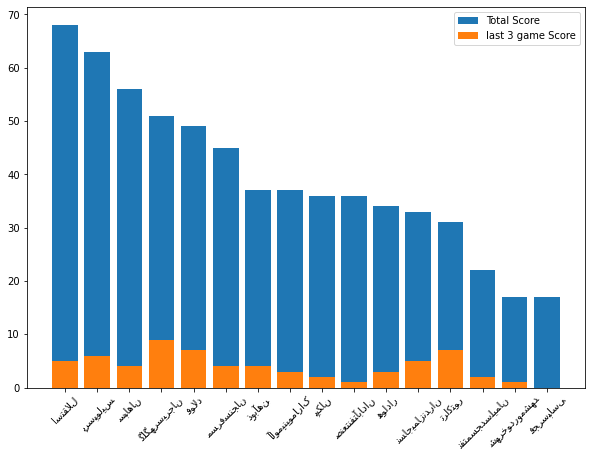

In [43]:
''' Enter your code here'''

<hr />
<hr />
<hr />
<hr />
<hr />
<hr />
<hr />
<hr />
<hr />
<hr />
<hr />
<hr />
<hr />

## 💭💭💭Task 2: Phone Shop💭💭💭

<a name="Task2"></a>

📖 Now let's search for a nice new phone in <b>technolife</b> by crawling it. :) <br />
Below you can see the URL of the first page in the phone section <br />
https://www.technolife.ir/product/list/69_800_801/%D8%AA%D9%85%D8%A7%D9%85%DB%8C-%DA%AF%D9%88%D8%B4%DB%8C%E2%80%8C%D9%87%D8%A7?code=69_800_801&plp=%D8%AA%D9%85%D8%A7%D9%85%DB%8C-%DA%AF%D9%88%D8%B4%DB%8C%E2%80%8C%D9%87%D8%A7&page=1

<b>Notes</b>
- if we want to crawl laptops from all pages, we should change the URL accordingly (For example, ```page=1``` should change to ```page=2```.
In this example, we want to crawl the first 10 pages.
- Crawling 10 pages might take a while to finish, so begin with just a few pages and increase the number when you're sure about your code. Using ```tqdm``` library helps by showing a progress bar! install it with ```pip``` or ```conda``` before running the code below.


In [ ]:
'''
You can install tqdm here
'''


### 💭 Crawling and saving the info
💭 Open the URL above and Inspect the web page and their elements like title, price , ... to familiarize yourself with them.

<hr />
💭 Complete the crawling code below...



<b>Notes:</b> Please apply no preprocessing or data cleaning! <b>Just save the raw data</b>. You can also change the pages by manipulating the URL in the ```For``` loop below. Your results should look like the table provided in the output cell below.

In [1]:
import requests
from bs4 import BeautifulSoup 
import pandas as pd
from tqdm import tqdm

url = 'https://www.technolife.ir/product/list/69_800_801/%D8%AA%D9%85%D8%A7%D9%85%DB%8C-%DA%AF%D9%88%D8%B4%DB%8C%E2%80%8C%D9%87%D8%A7?code=69_800_801&plp=%D8%AA%D9%85%D8%A7%D9%85%DB%8C-%DA%AF%D9%88%D8%B4%DB%8C%E2%80%8C%D9%87%D8%A7&page='

result = []

for page in tqdm(range(1, 10)):
    
    '''' Enter your code here to Change the URL page '''
    # new_url = 
    
    page = requests.get(new_url)
    soup = BeautifulSoup(page.text, 'html.parser')
    
    # Get product list
    products = soup.select('div#productsList>ul>li')
    for p in products:
        # Get product title
        title = p.select('a.ProductComp_product_title__bOrf5>strong')[0].text

        # Get product price
        price = -1

        offer_section = p.select_one('div.ProductComp_product_off_box__OfLBa')
        
        if not offer_section:
            # there is no offer for this product (main price)
            main_price = p.select_one('section.ProductComp_product_price__S4_x8>div.ProductComp_main_price__XgWce')
            price = main_price.select('span')[0].text
        else:
            # there is offer for this product (offer price)
            '''' Enter your code here to extract product offer price '''
            # offer_price =
            # price = 
        
        # Get product specs (hard disk/screen size/camera/battery)
        '''' Enter your code here to extract product specs '''
        # specs = p.select('''Enter code here''')
        # hard_disk = 
        # size = 
        # camera =
        # battery = 
        
        result.append({
            'title': title,
            'hard disk': hard_disk,
            'size': size,
            'camera': camera,
            'battery': battery,
            'price': price
        })

# Saving dictionary in a dataframe
data = pd.DataFrame(result)
data

100%|██████████| 9/9 [00:14<00:00,  1.58s/it]


,title,hard disk,size,camera,battery,price
0,گوشی موبايل سامسونگ مدل گلکسی A32 4G دو سیم کا...,128,6.4,64,5000,"6,199,000"
1,گوشی موبايل نوکيا مدل 105 (2019) ظرفیت 4 مگابا...,4,1.77,,800,"635,000"
2,گوشی موبایل سامسونگ مدل Galaxy A13 ظرفیت 64 ...,64,6.6,50,5000,"4,555,000"
3,گوشی موبايل سامسونگ مدل Galaxy A52s 5G ظرفیت 2...,256,6.5,64,4500,"11,899,000"
4,گوشی موبايل نوکيا مدل 106 (2018) ظرفیت 4 مگابا...,4,1.8,,800,"630,000"
...,...,...,...,...,...,...
283,گوشی موبایل شیائومی Redmi Note 10S ظرفیت 128 گ...,64,128,6.43,5000,"5,559,000"
284,گوشی موبایل نوکیا 150 (2020),4,2.4,VGA,1020,"1,129,000"
285,گوشی موبایل نوکیا مدل G10 ظرفیت 64 گیگابایت - ...,64,6.52,13,5050,"3,369,000"
286,گوشی موبایل شیائومی مدل Poco M4 Pro - ظرفیت 25...,256,6.43,64,5000,"6,449,000"


<hr />

### 💭 Clean the pandas dataframe
<a name="Task2:clean"></a>

 - Fix data types
   - `hard disk` -> `int`
   - `size` -> `float`
   - `camera` -> `float`
   - `battery` -> `int`
   - `price` -> `int`
 - Normalize Arabic characters
 - Extract RAM inforamtion. (Use Regex)
 - Clean `title` column
   - Remove redundant words (e.g. گوشی)
   - Remove parts related to RAM/Storage information
   - Remove non-word characters (e.g. -)
 
 You can play around with your <b><span style="color:green">Regex</span></b> patterns <b>[here](https://regexr.com/)</b>

In [2]:
# Fix data types

data['camera'] = data['camera'].replace(['VGA', ''], 0)

'''Convert these datatypes'''
# data['camera'] = 
# data['battery'] = 
# data['hard disk'] = 
# data['size'] = 

'''Convert price (It needs a little more work)'''
# data['price'] = 

In [4]:
# Normalize Arabic characters

def normalize_char(txt):
    txt = txt.replace('ك', 'ک')
    txt = txt.replace('دِ', 'د')
    txt = txt.replace('زِ', 'ز')
    txt = txt.replace('ذِ', 'ذ')
    txt = txt.replace('شِ', 'ش')
    txt = txt.replace('سِ', 'س')
    txt = txt.replace('ى', 'ی')
    txt = txt.replace('ي', 'ی')
    return txt

data['title'] = data['title'].apply(normalize_char)

In [5]:
# Extract RAM
import re 

def extract_ram(title):
    info = re.findall(r'رم (\d+) (مگابایت|گیگابایت)', title)
    if len(info)>0:
        if info[0][1] == 'مگابایت':
            return int(info[0][0])
        else:
            return int(info[0][0]) * 1024
    else:
        return 0

data['ram'] = data['title'].apply(extract_ram)

In [6]:
# Clean title
def clean(title):
    title = title.replace('گوشی', '')
    title = title.replace('موبایل', '')
    title = title.replace('مدل', '')
    title = re.sub(r'رم \d+ (مگابایت|گیگابایت)', '', title)
    title = re.sub(r'ظرفیت \d+ (مگابایت|گیگابایت)', '', title)
    title = re.sub(r'\W+', ' ', title)
    return title.strip()

data['title'] = data['title'].apply(clean)

<hr />

💭 Run these 2 code blocks at the end of your task

In [ ]:
data.info()

In [ ]:
data

<hr />

### 💭Learn more about the data

Good job so far. Now let's gain some insights from the data we crawled!

<a name="Task2:clean"></a>

💭 Show me all Samsung (سامسونگ) phones that have a 128GB hard disk.

In [ ]:
'''Enter your code here'''

<hr />

💭 Show me the phone with most battery capacity.

In [ ]:
'''Enter your code here'''

<hr />

💭 Categorize `price` column into below ranges and tell me how many phones there are from each price catgory is?:
- (0.0, 1000000.0] : very low
- (1000000.0, 5000000.0] : low
- (5000000.0, 10000000.0] : mid
- (10000000.0, 20000000.0] : high
- (20000000.0, inf] : very high

<b>HINT</b>: use `pd.cut` method

 

In [ ]:
'''Enter your code here'''

<hr />

💭 plot `stacked bar plot` for count of each brand's price category. (Your table should look like the one in the output cell)
- consider these brands:
    - نوکیا
    - سامسونگ
    - شیائومی
    - اپل

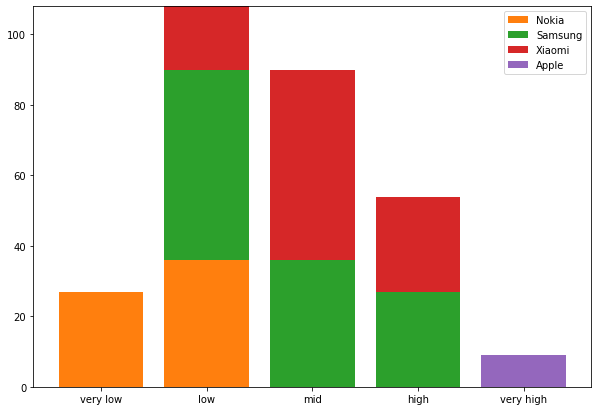

In [78]:
'''Enter your code here'''

<hr />

💭 plot `Side-by-Side Boxplot` for price of phones with hard disk capacity of `64, 128 and 256`. (Your table should look like the one provided in the output cell)

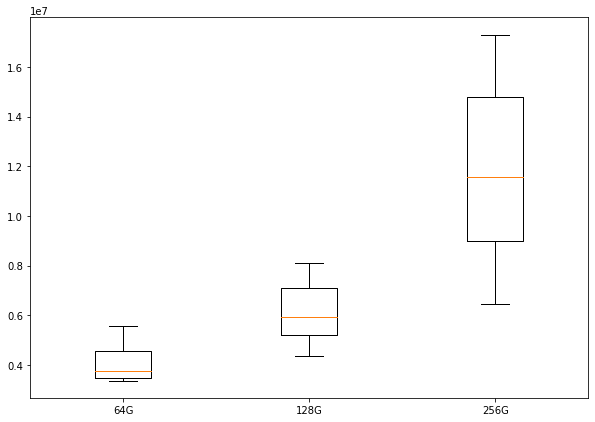

In [77]:
'''Enter your code here'''

<hr />
<hr />

<span style="color:green">
    
- Get crawling! but always treat the data & its owners with respect. There are a number of online articles about ethics of crawling. Check them out if you are interested. :)  
    
- Also learning Selenium and Spyder libraries is recommended if you're interested in advanced crawling!

</span>


<hr />
<hr />

# Good Luck 😉

# More on crawling:
- An awesome free Persian <b><a  href=https://programming.tosinso.com/fa/videos/8506/%D8%AF%D9%88%D8%B1%D9%87-%D8%A2%D9%85%D9%88%D8%B2%D8%B4%DB%8C-%D8%B1%D8%A7%DB%8C%DA%AF%D8%A7%D9%86-Web-Scraping-%D8%A8%D8%A7-%D8%B2%D8%A8%D8%A7%D9%86-%D8%A8%D8%B1%D9%86%D8%A7%D9%85%D9%87-%D9%86%D9%88%DB%8C%D8%B3%DB%8C-%D9%BE%D8%A7%DB%8C%D8%AA%D9%88%D9%86 > course</a></b>. 